该算法使用前几帧图像进行背景建模（默认120帧）。因此，在前几帧图像的结果中你会得到一个全黑色的图像。

运用形态学开运算，对去除上述返回的结果去除噪声很有帮助。

In [2]:
import cv2 
import matplotlib.pyplot as plt
from PIL import Image

`cv2.getStructuringElement()` 

返回指定形状和尺寸的结构元素。

这个函数的第一个参数表示内核的形状，有三种形状可以选择。
+ 矩形：MORPH_RECT;
+ 交叉形：MORPH_CROSS;
+ 椭圆形：MORPH_ELLIPSE;

第二和第三个参数分别是内核的尺寸以及锚点的位置。一般在调用erode以及dilate函数之前，先定义一个Mat类型的变量来获得

```python
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))  # 矩形结构
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))  # 椭圆结构
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))  # 十字形结构
```

![getstructuringelement](./imgdata/)

In [5]:
video = cv2.VideoCapture('./imgdata/car.flv')
video.set(cv2.CAP_PROP_POS_FRAMES, 300)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
fgbg = cv2.bgsegm.createBackgroundSubtractorGMG()

mark = 1
for _ in range(165):
    ret, frame = video.read()
    fgmask = fgbg.apply(frame)
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
    
    cv2.imwrite(f'./background_substract3/img_{mark}.jpg', fgmask)
    mark += 1

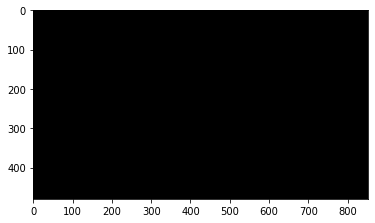

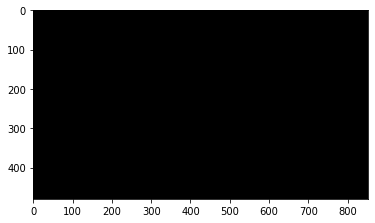

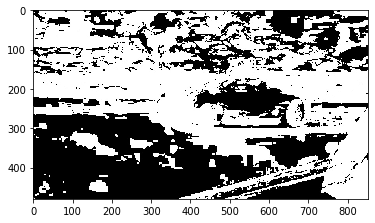

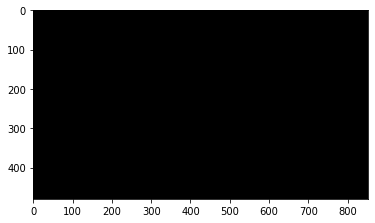

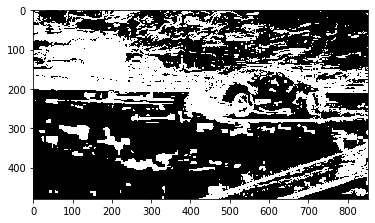

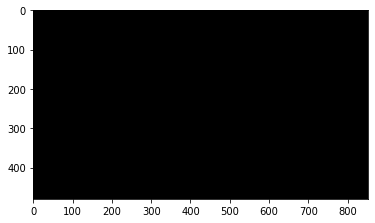

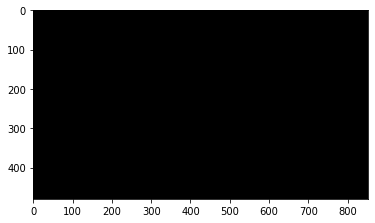

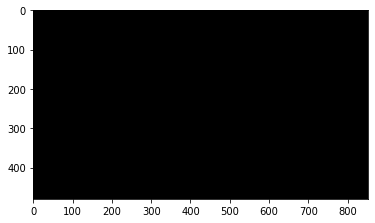

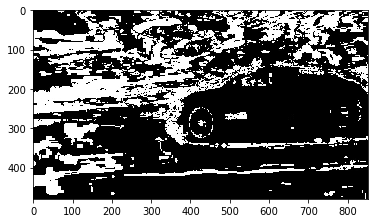

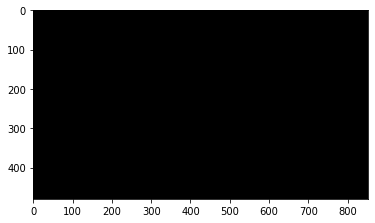

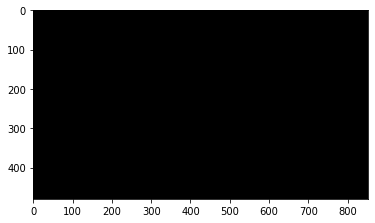

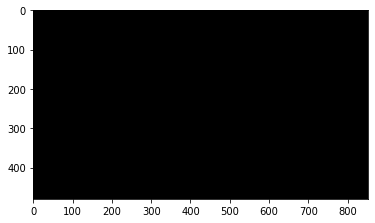

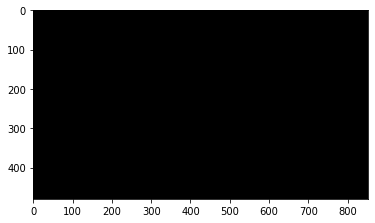

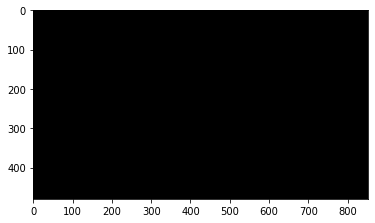

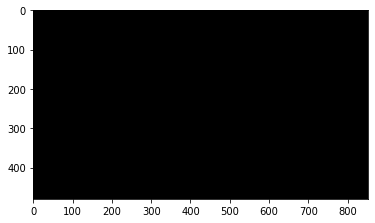

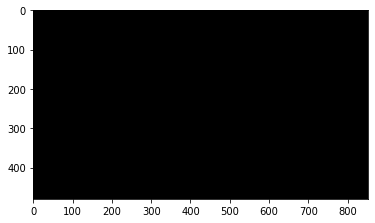

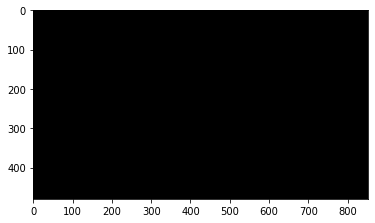

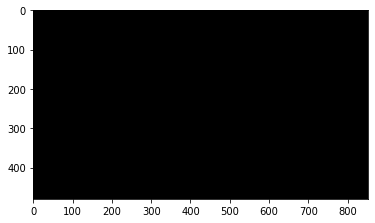

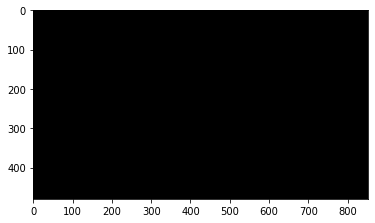

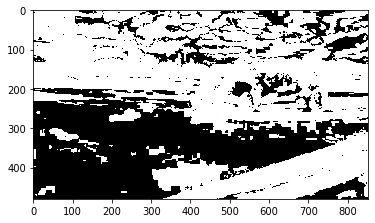

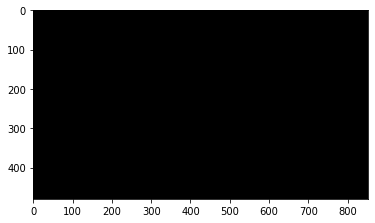

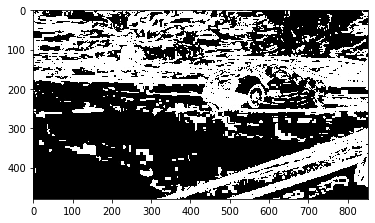

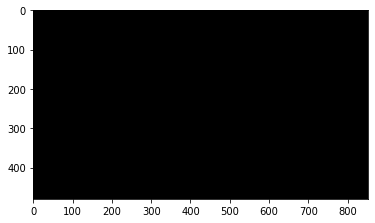

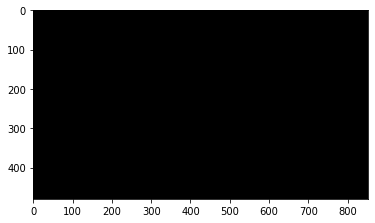

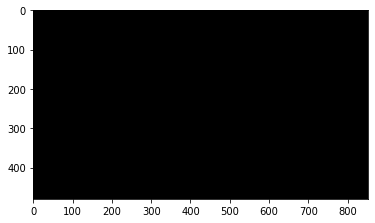

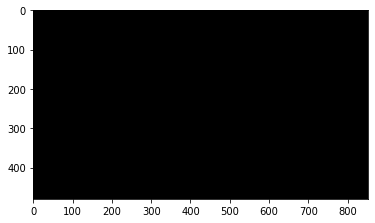

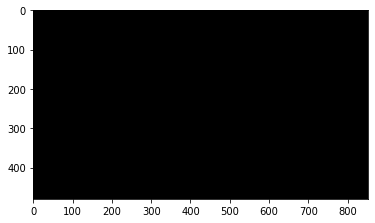

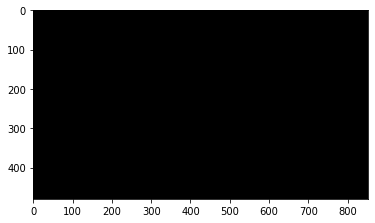

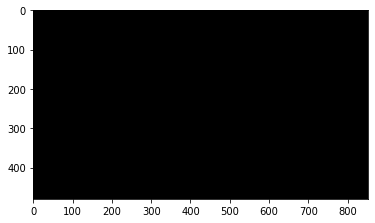

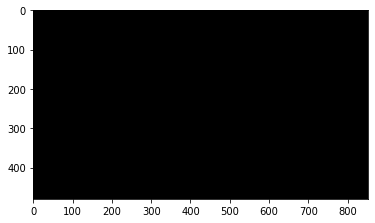

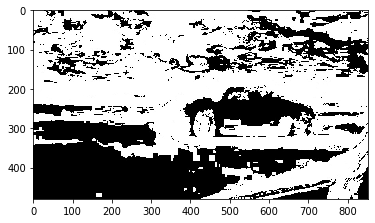

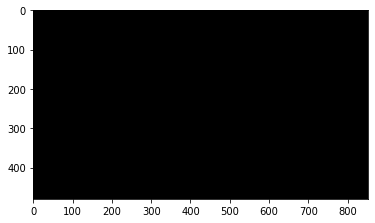

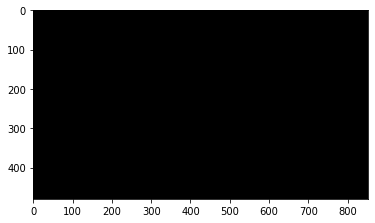

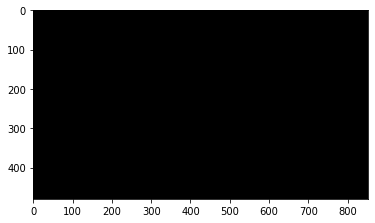

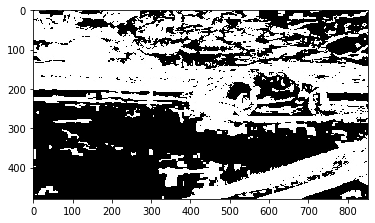

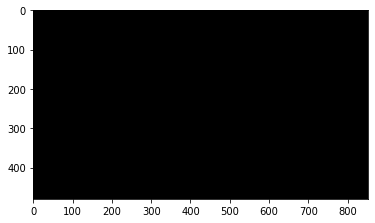

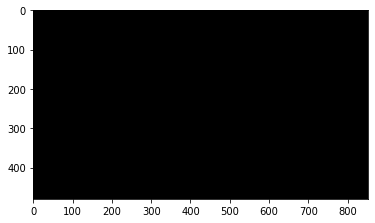

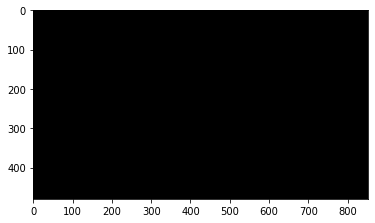

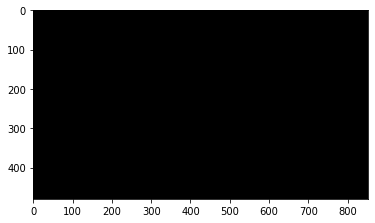

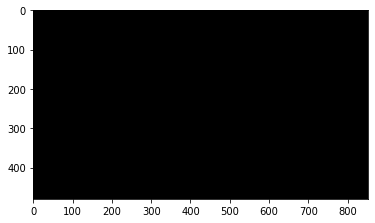

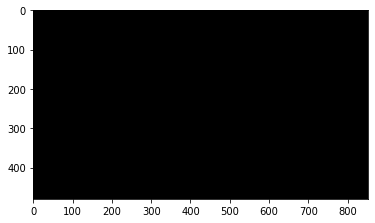

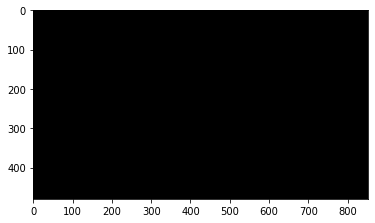

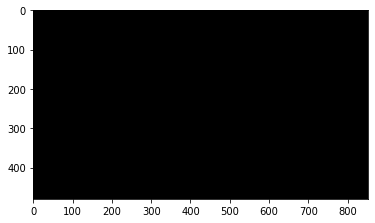

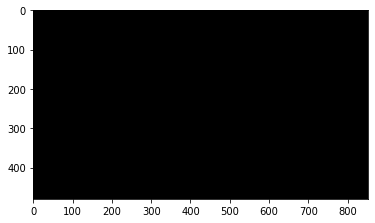

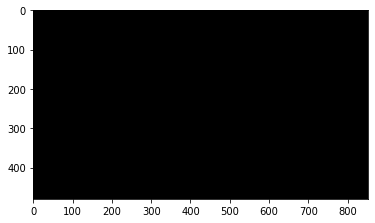

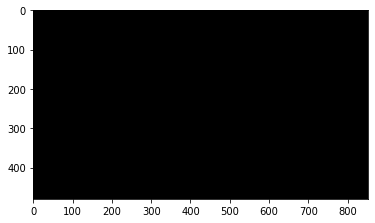

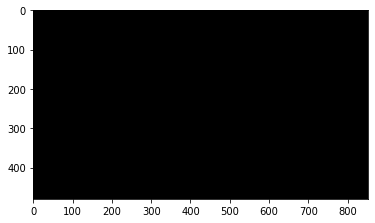

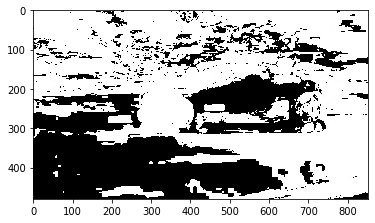

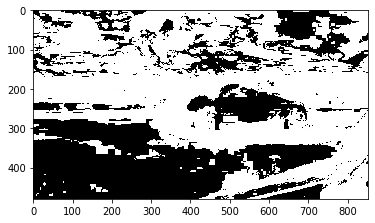

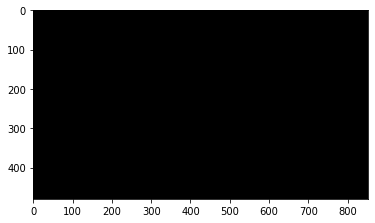

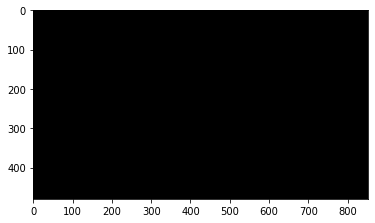

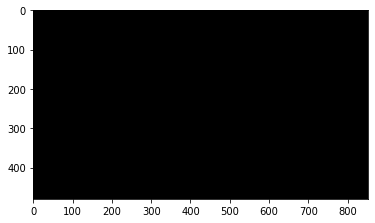

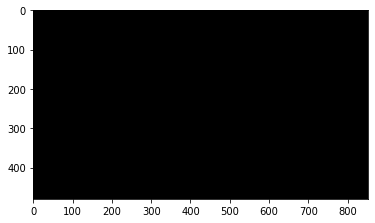

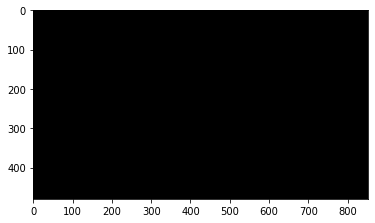

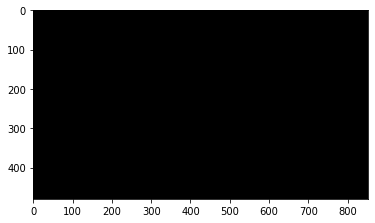

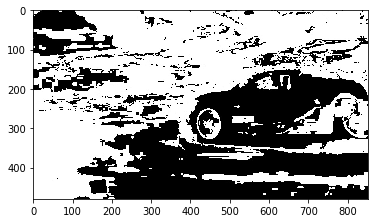

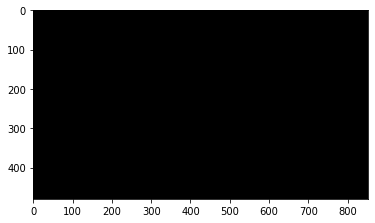

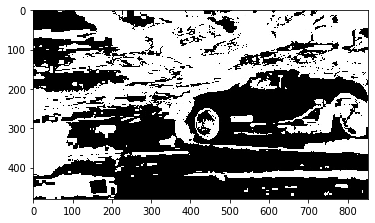

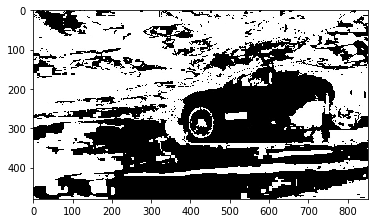

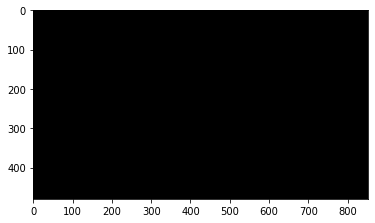

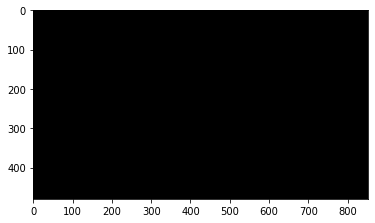

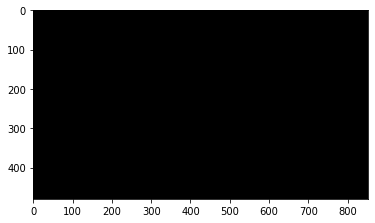

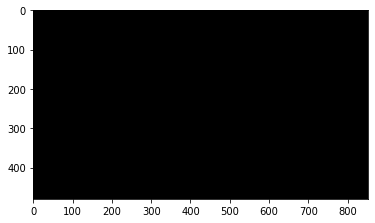

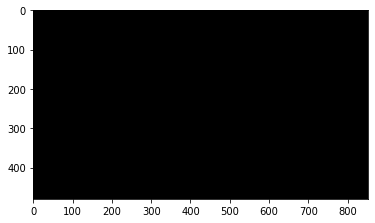

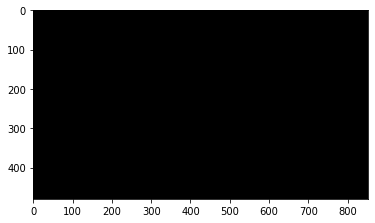

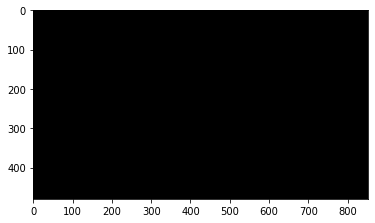

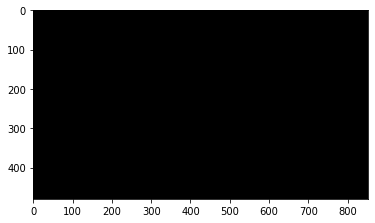

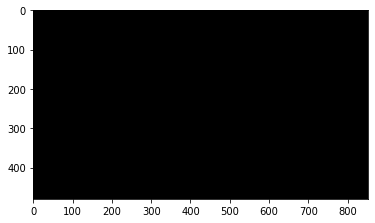

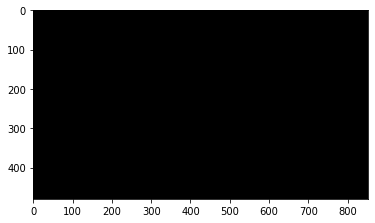

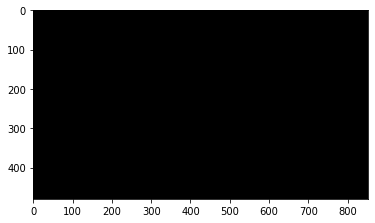

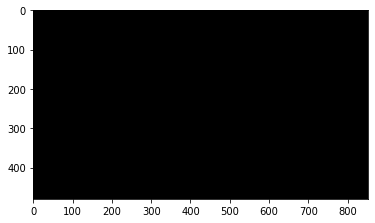

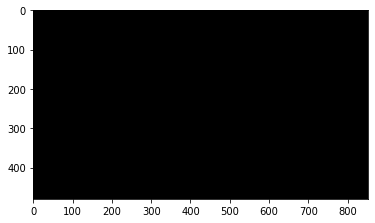

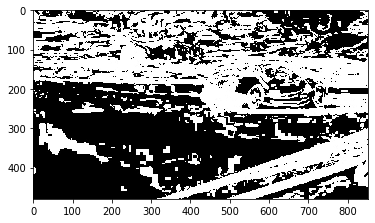

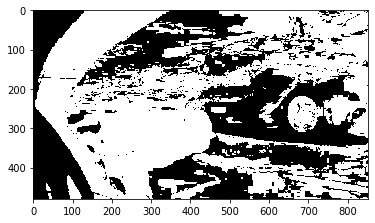

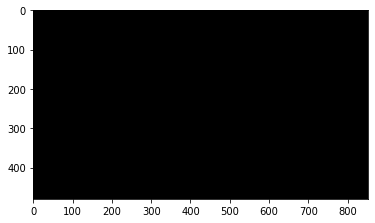

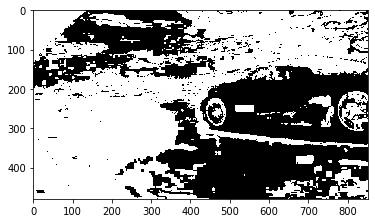

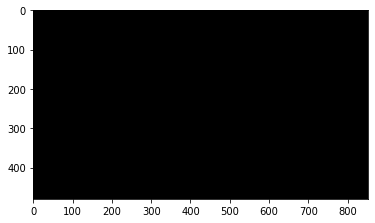

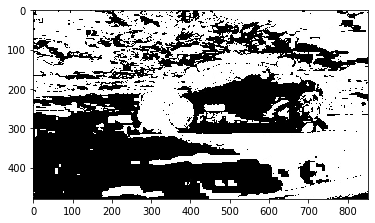

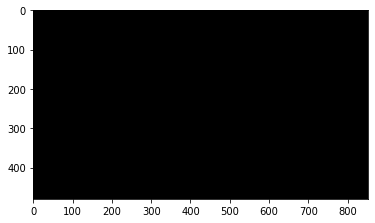

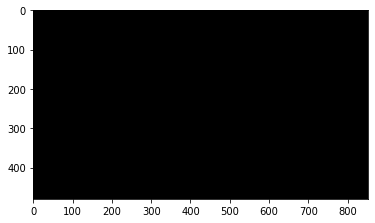

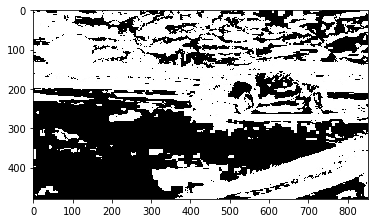

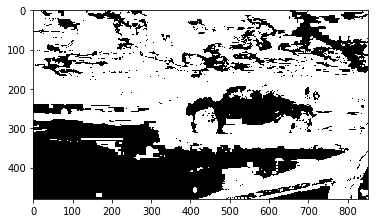

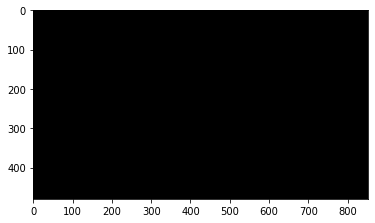

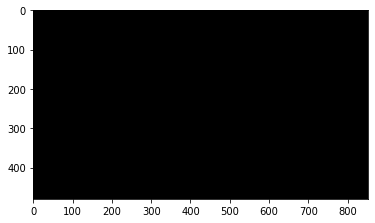

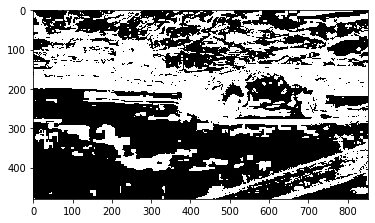

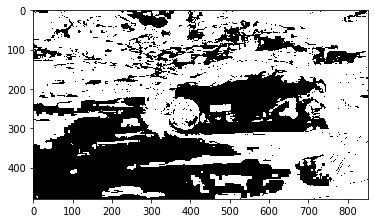

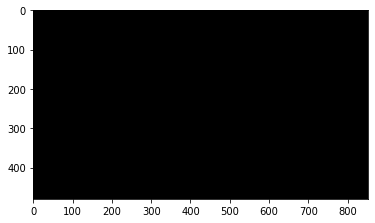

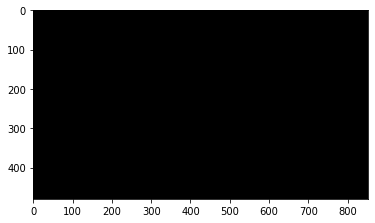

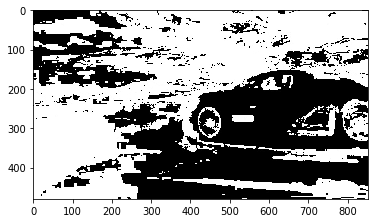

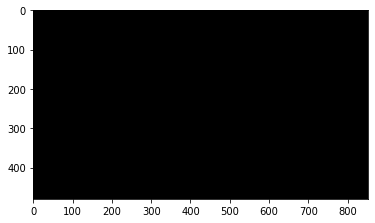

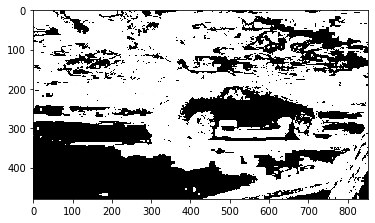

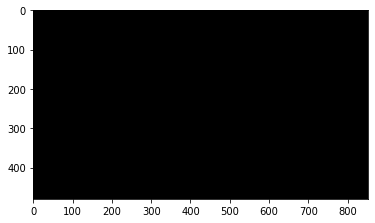

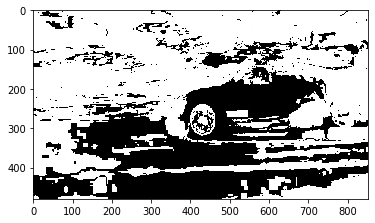

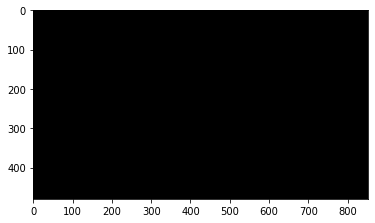

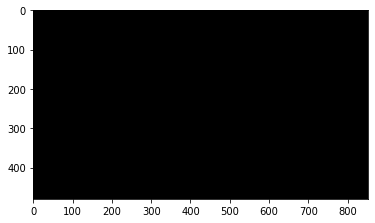

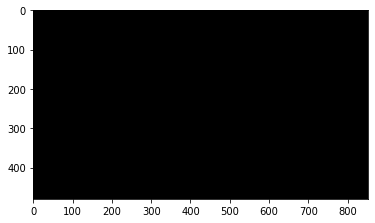

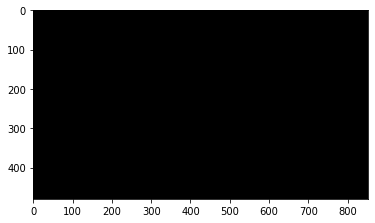

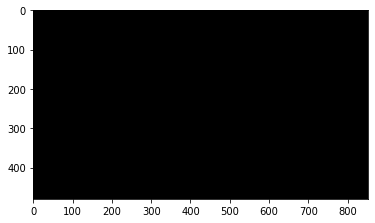

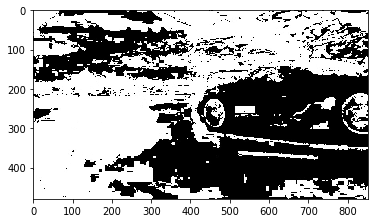

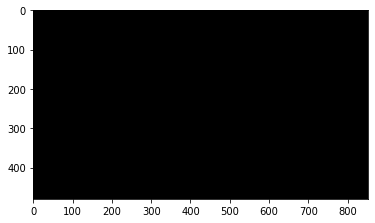

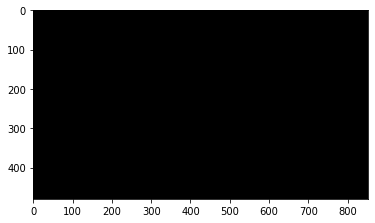

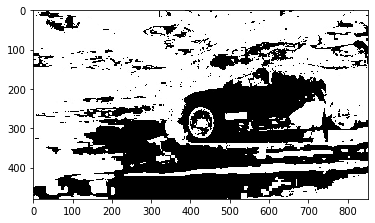

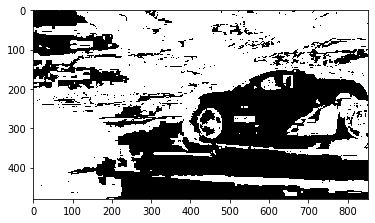

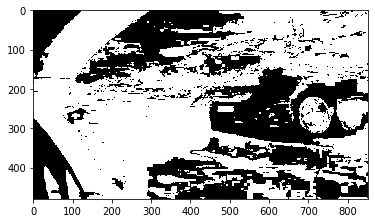

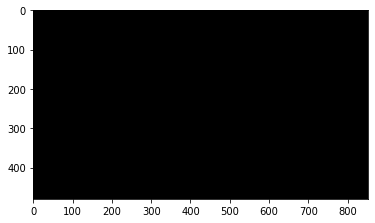

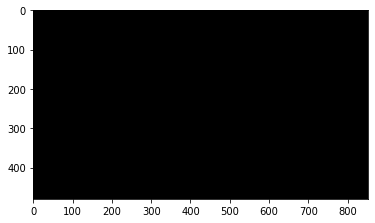

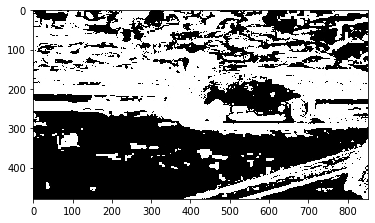

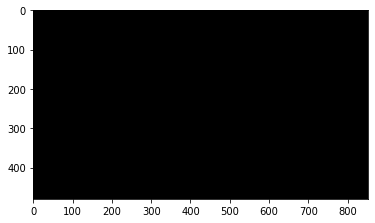

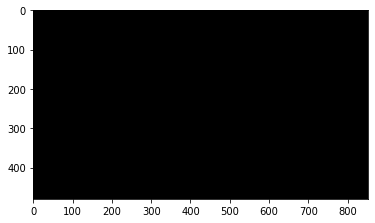

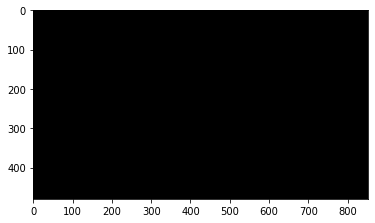

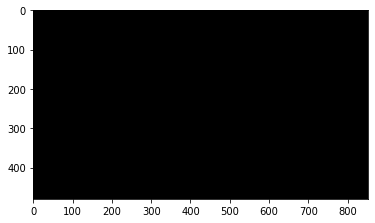

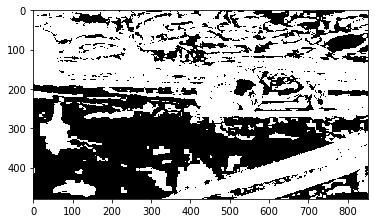

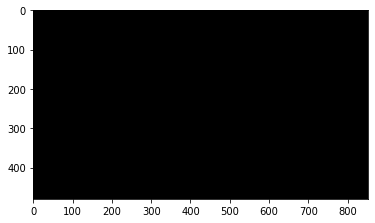

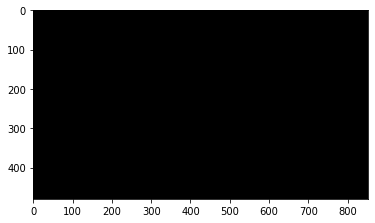

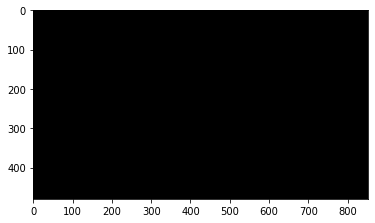

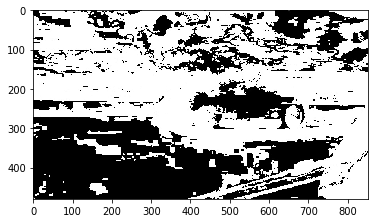

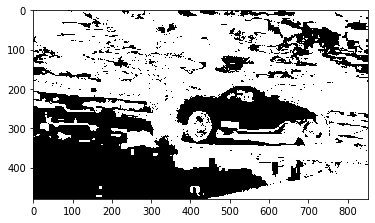

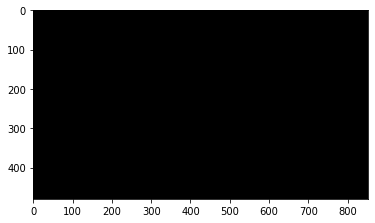

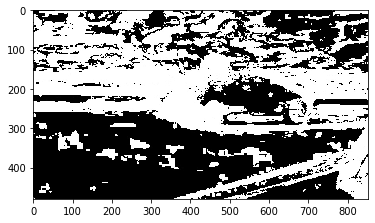

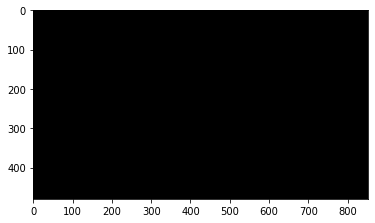

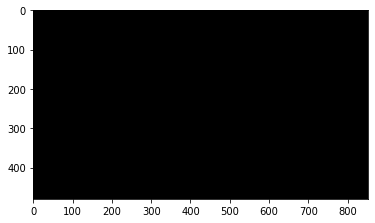

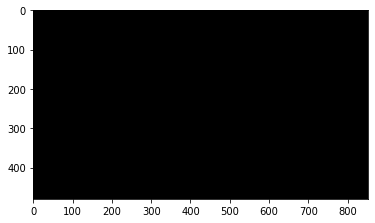

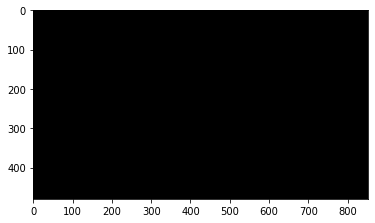

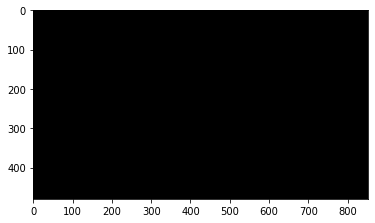

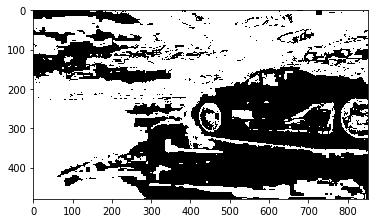

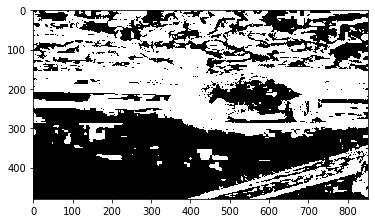

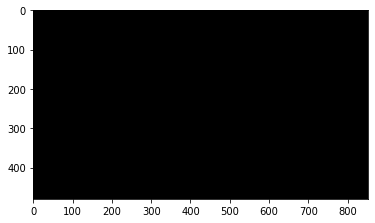

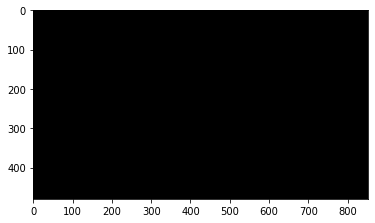

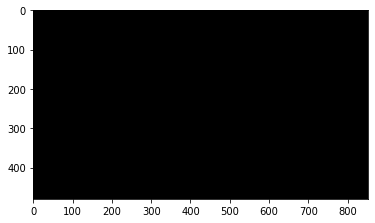

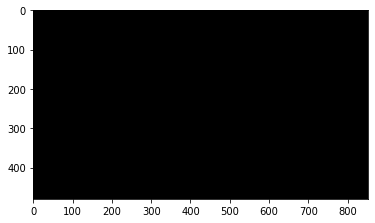

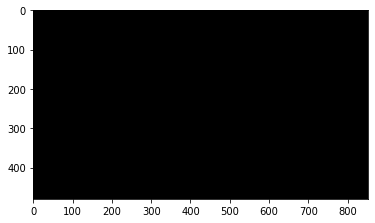

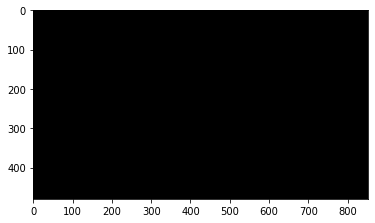

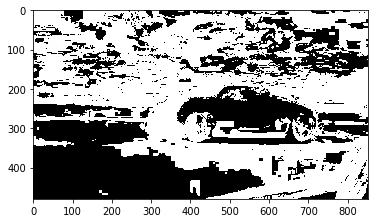

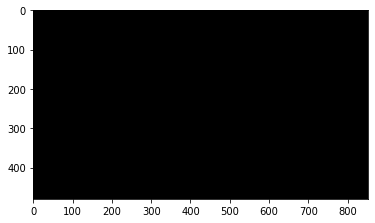

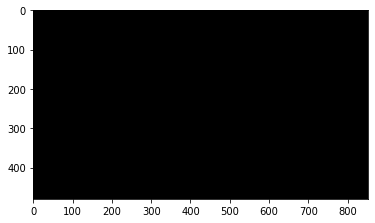

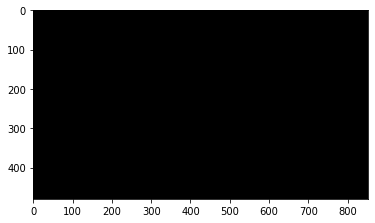

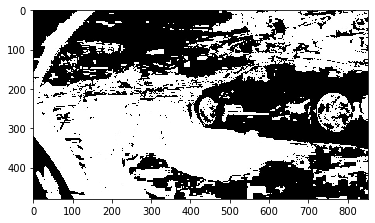

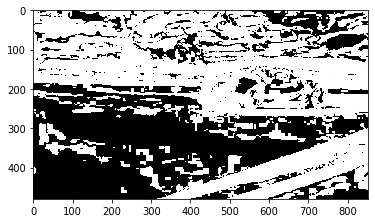

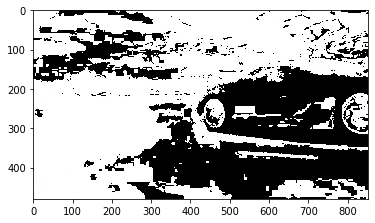

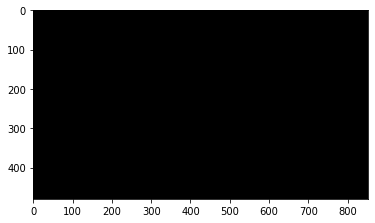

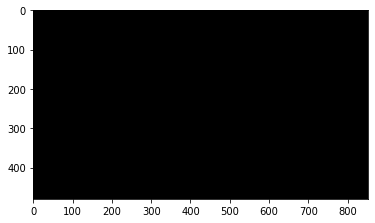

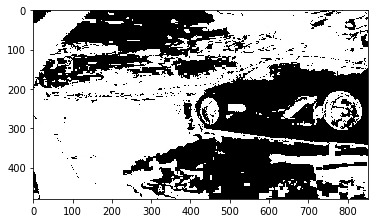

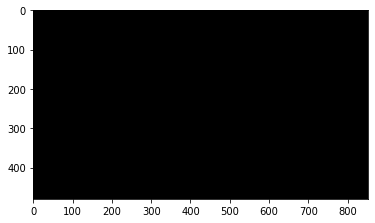

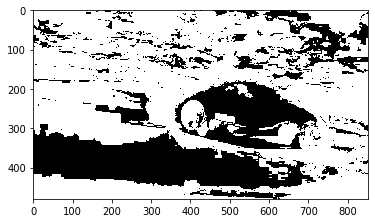

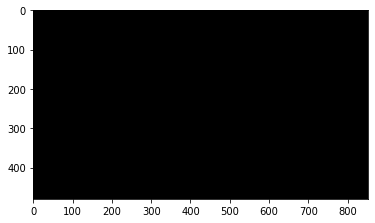

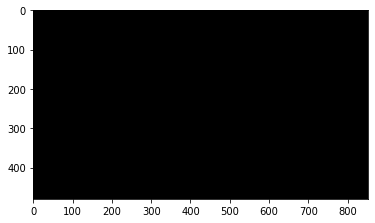

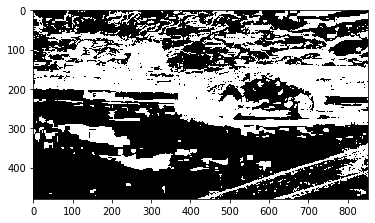

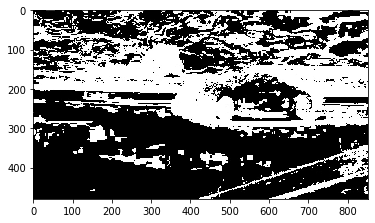

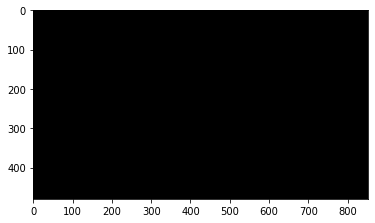

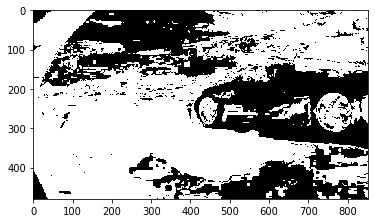

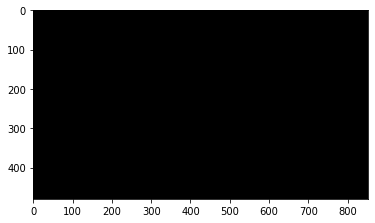

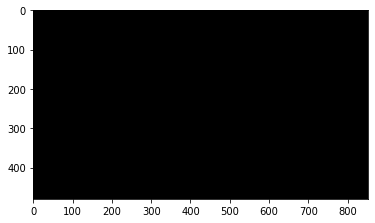

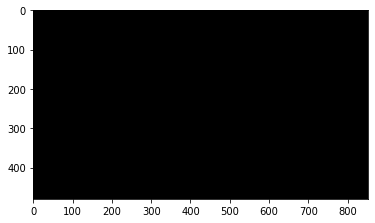

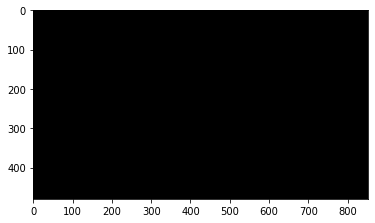

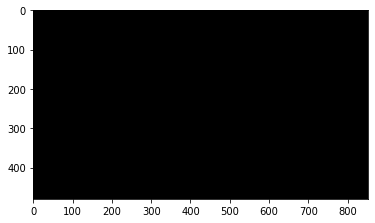

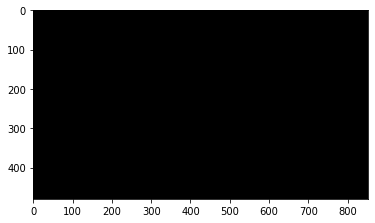

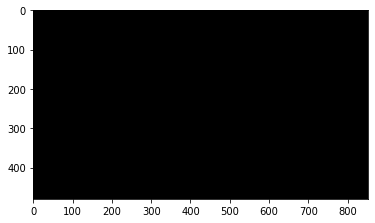

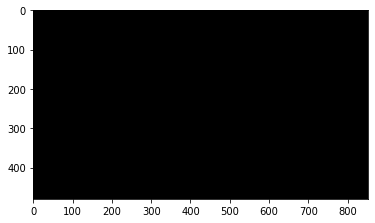

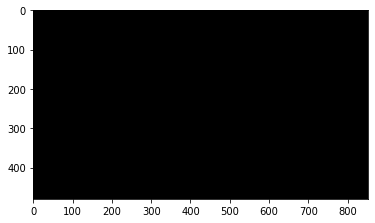

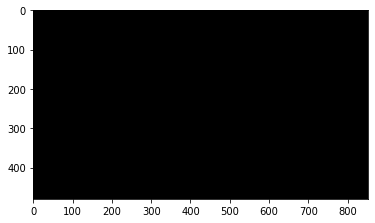

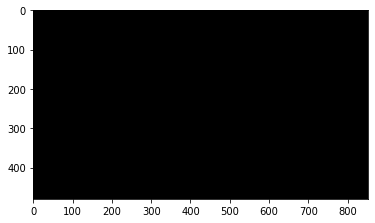

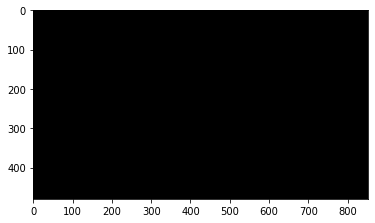

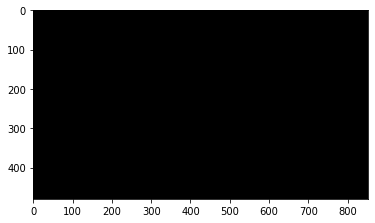

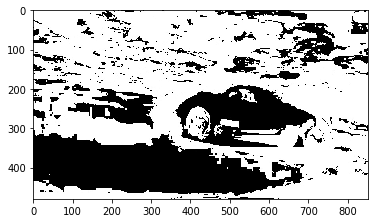

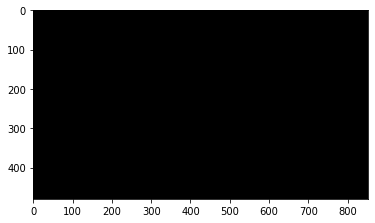

In [6]:
result = Path('./background_substract3/')

for p in result.iterdir():
    if p.is_file():
        img = np.asarray(Image.open(str(p)))
        plt.imshow(img, cmap='gray')
        plt.show()